In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import logging

In [2]:
# The set of pixel configurations that will be examined
IMAGES = [
        [[0,1,0],[1,1,1],[0,1,0]],
        [[1,0,0],[1,1,1],[1,0,0]],
        [[1,1,0],[0,1,1],[0,0,1]],
        [[0,1,1],[1,1,0],[1,0,0]],
        [[1,1,0],[1,1,1],[0,0,0]],
        [[1,1,0],[1,1,0],[0,1,0]],
]

In [3]:
def theta_image(im):
    """ Derive THETA_IMAGE based on the SExtractor manual (Sec. 10.1)"""
    x,y = np.array(np.where(im),dtype=float)-1
    logging.info('x = %s; y = %s'%(x,y))
    xbar = np.sum(x)/np.sum(im)
    ybar = np.sum(y)/np.sum(im)
    logging.info('xbar = %s; ybar = %s'%(xbar,ybar))
    x2bar = np.sum(x**2)/np.sum(im) - xbar**2
    y2bar = np.sum(y**2)/np.sum(im) - ybar**2
    logging.info('x2bar = %s; y2bar = %s'%(x2bar,y2bar))
    xybar = np.sum(x*y)/np.sum(im) - xbar*ybar
    logging.info('xybar = %s'%xybar);
    theta = np.degrees(np.arctan2(2*xybar,(x2bar - y2bar))/2)
    return theta

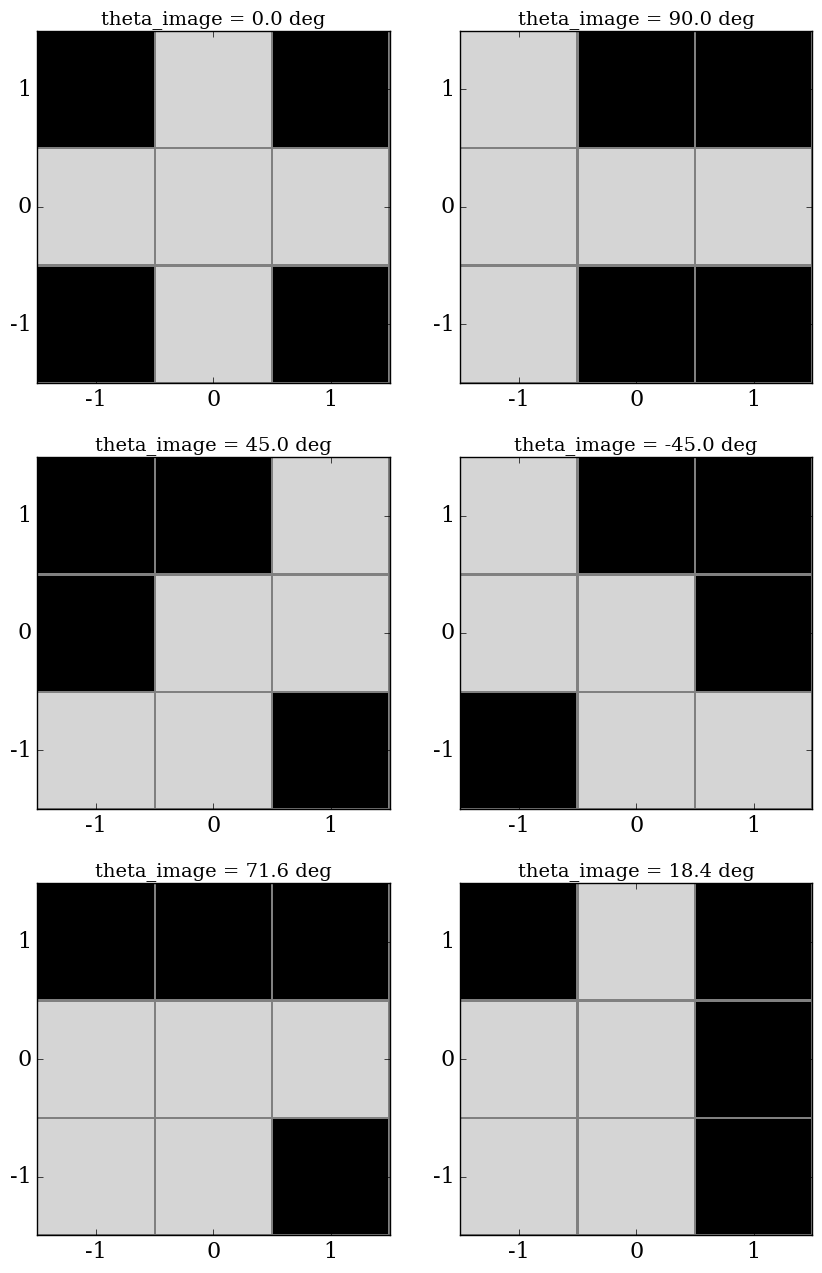

In [4]:
# Set logging.INFO to print info
logging.getLogger().setLevel(logging.WARN)

fig,axes = plt.subplots(len(IMAGES)//2 + len(IMAGES)%2,2,figsize=(10,16))
plt.subplots_adjust(hspace=0.1)
for j,im in enumerate(IMAGES):
    ax = axes[j//2,j%2]
    plt.sca(ax)
    im = np.array(im)
    theta = theta_image(im)
    ax.pcolormesh(im,edgecolor='gray',cmap='gray',vmax=1.2)
    ax.set_aspect('equal')
    ax.set_xticks([0.5,1.5,2.5]); ax.set_xticklabels([-1,0,1])
    ax.set_yticks([0.5,1.5,2.5]); ax.set_yticklabels([-1,0,1])
    plt.title("theta_image = %.1f deg"%theta,fontsize=14)
